In [3]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## A/B Testing

#### Watch Demo Video Below

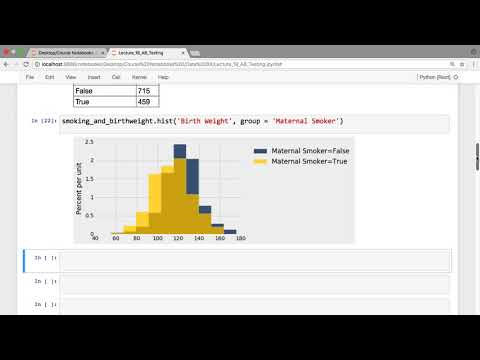

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('wtj1Whiut60', width=800, height=300)

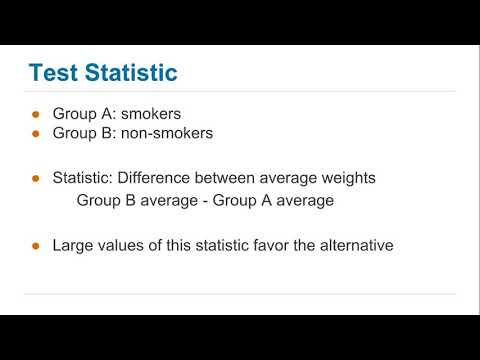

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('tR4XBhAvtD8', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
baby = Table.read_table('baby.csv')
baby

In [ ]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

In [ ]:
smoking_and_birthweight.group('Maternal Smoker')

In [ ]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [ ]:
means_tbl = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_tbl

#### Watch Demo Video Below


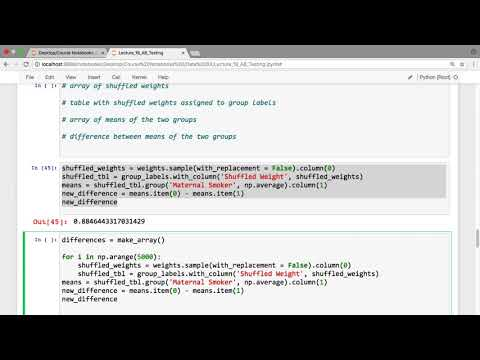

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('2xn48Vql1dQ', width=800, height=300)

In [ ]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

In [ ]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

In [ ]:
weights.sample(with_replacement=False)

In [ ]:
shuffled_weights = weights.sample(with_replacement=False).column(0)

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Birth Weight', shuffled_weights
)

In [ ]:
original_and_shuffled

In [ ]:
original_and_shuffled.group('Maternal Smoker', np.average)

In [ ]:
group_labels = baby.select('Maternal Smoker')
group_labels

In [ ]:
# array of shuffled weights

# table with shuffled weights assigned to group labels

# array of means of the two groups

# difference between means of the two groups

In [ ]:
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

In [ ]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

In [ ]:
Table().with_column('Difference Between Means', differences).hist(bins=20, ec='w')

In [ ]:
observed_difference

## Deflategate

#### Watch Demo Video Below

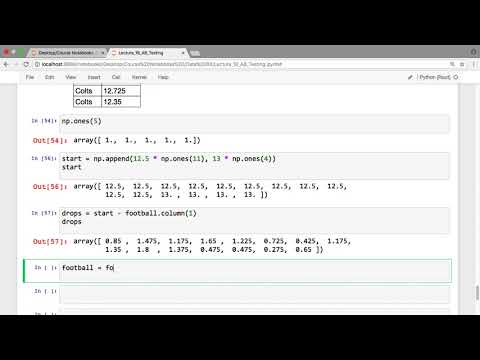

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('5et2jH5LHcc', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [4]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [5]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1) + football.column(2)) / 2
)

In [6]:
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [7]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [8]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [9]:
drops = start - football.column(1)
drops

array([0.85 , 1.475, 1.175, 1.65 , 1.225, 0.725, 0.425, 1.175, 1.35 ,
       1.8  , 1.375, 0.475, 0.475, 0.275, 0.65 ])

In [10]:
football = football.select('Team').with_column(
    'Drop', drops
)

In [11]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [12]:
means_tbl = football.group('Team', np.average)

In [13]:
means_tbl

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [14]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)

In [15]:
observed_difference

-0.733522727272728

#### Watch Demo Video Below

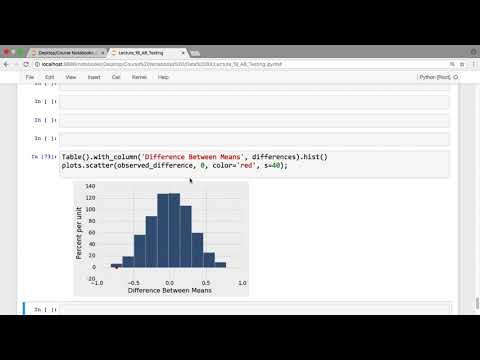

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('CxUeGgLXMOc', width=800, height=300)

In [16]:
group_labels = football.select('Team')
drop_tbl = football.select('Drop')

In [17]:
shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
means = shuffled_tbl.group('Team', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

-0.2562500000000001

In [18]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means = shuffled_tbl.group('Team', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


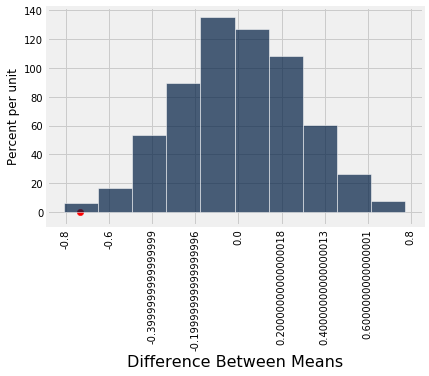

In [19]:
Table().with_column('Difference Between Means', differences).hist(ec='w')
plots.scatter(observed_difference, 0, color='red', s=40);

In [20]:
np.count_nonzero(differences <= observed_difference) / 20000

0.00305